### Nettoyage des données (Partie 1 de l'exercice)

In [1]:
#inportation des librairies
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

**Importation des données** <br/> données de https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/dataset_P4.zip

In [2]:
#importation des données dans des dataframes
clients = pd.read_csv("dataset_P4/customers.csv")
products = pd.read_csv("dataset_P4/products.csv")
transactions = pd.read_csv("dataset_P4/transactions.csv")

### 1. Apperçu des tables

In [3]:
clients.head(), clients.shape

(  client_id sex  birth
 0    c_4410   f   1967
 1    c_7839   f   1975
 2    c_1699   f   1984
 3    c_5961   f   1962
 4    c_5320   m   1943,
 (8623, 3))

In [4]:
products.head(), products.shape

(  id_prod  price  categ
 0  0_1421  19.99      0
 1  0_1368   5.13      0
 2   0_731  17.99      0
 3   1_587   4.99      1
 4  0_1507   3.99      0,
 (3287, 3))

In [5]:
transactions.head(), transactions.shape

(  id_prod                        date session_id client_id
 0  0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450
 1   2_226  2022-02-03 01:55:53.276402   s_159142     c_277
 2   1_374  2021-09-23 15:13:46.938559    s_94290    c_4270
 3  0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597
 4  0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242,
 (337016, 4))

In [6]:
#recherche de valeurs nulles / manquantes
clients.isnull().sum(), products.isnull().sum(), transactions.isnull().sum()

(client_id    0
 sex          0
 birth        0
 dtype: int64,
 id_prod    0
 price      0
 categ      0
 dtype: int64,
 id_prod       0
 date          0
 session_id    0
 client_id     0
 dtype: int64)

In [7]:
clients.isna().sum(), products.isna().sum(), transactions.isna().sum()

(client_id    0
 sex          0
 birth        0
 dtype: int64,
 id_prod    0
 price      0
 categ      0
 dtype: int64,
 id_prod       0
 date          0
 session_id    0
 client_id     0
 dtype: int64)

#### *=> aucun null dans aucun des csv*

### 1.1 Analyse des tables individuellement

1.1.1 analyse csv 'clients'

In [8]:
# pas de doublons dans 'clients'
clients.loc[clients['client_id'].duplicated(keep=False),:]

,client_id,sex,birth


#### "*Deux individus avec les mêmes valeurs pour une clé sont un doublon !*" Nicolas Rangeon, Cours OpenClassrooms <br/>https://openclassrooms.com/fr/courses/7410486-nettoyez-et-analysez-votre-jeu-de-donnees/7450826-gerez-les-differentes-erreurs-dun-jeu-de-donnees

In [9]:
#On teste la clé primaire : {'client_id'}
def testClePrim(df, column):
    if len(df) != len(df[column].drop_duplicates()):
        print("ce n'est pas une clé unique")
    else : print("c'est une clé unique")

testClePrim(clients, ['client_id'])

c'est une clé unique


### discrétiser les ages

In [10]:
#On créée 2 nouvelles colonnes dans la table afin de s'en servir pour l'analyse qui suit
clients['age'] = 2022 - clients['birth']

In [11]:
#colonne tranche d'age
clients['age_categ'] = pd.cut(clients['age'], bins=[0, 25, 60, float('Inf')], labels=['<=25', '25-60', '>60'])

#### 1.1.1 analyse csv products

In [12]:
#On remarque un prix de 300 € qui parraît abberrant pour un livre
#et un produit de prix négatif, la moyenne étant ~21€
products.price.describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

In [13]:
products.loc[products['price'].isnull()]

,id_prod,price,categ


In [14]:
# Le produit 'T_0' a un prix négatif c'est suspect
products.loc[products['price'] == 0, :], products.loc[products['price'] < 0, :]

(Empty DataFrame
 Columns: [id_prod, price, categ]
 Index: [],
     id_prod  price  categ
 731     T_0   -1.0      0)

In [15]:
#pas de doublons dans 'products'
products.loc[products['id_prod'].duplicated(keep=False),:]

,id_prod,price,categ


In [16]:
#On teste la clé primaire : {'id_prod'}
def testClePrim(df, column):
    if len(df) != len(df[column].drop_duplicates()):
        print("ce n'est pas une clé unique")
    else : print("c'est une clé unique")

testClePrim(products, ['id_prod'])

c'est une clé unique


#### 1.1.2 Analyse table 'transactions'

In [17]:
# On trouve enormément de doublons
transactions.loc[transactions['session_id'].duplicated(keep=False),:].count()

id_prod       256699
date          256699
session_id    256699
client_id     256699
dtype: int64

In [18]:
# On cherche des patterns dans les dupes
dupes = transactions.loc[transactions['date'].duplicated(keep=False),:]
#Les dupes semblent avoir 'test' dans leur date
dupes.head()

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1


In [19]:
# On cherche des patterns dans les dupes :  ils sont tous s_0
dupes.session_id.unique(), dupes.client_id.unique()

(array(['s_0'], dtype=object), array(['ct_1', 'ct_0'], dtype=object))

In [20]:
#on enlève les s_0
transactions.drop(transactions[transactions['session_id'] == 's_0' ].index, inplace = True)
# test du drop -> OK
transactions.loc[transactions['session_id'] == 's_0',:]

,id_prod,date,session_id,client_id


1.1.3 analyse csv 'transactions'

In [21]:
#On teste la clé primaire : {'session_id', 'date'}
def testClePrim(df, column):
    if len(df) != len(df[column].drop_duplicates()):
        print("ce n'est pas une clé unique")
    else : print("c'est une clé unique")

testClePrim(transactions, ['session_id', 'date'])

c'est une clé unique


### 1.2 Analyse Correspondance des 'id_prod' entre tables 'products' et 'transactions'

In [22]:
#pas le même nb de produits dans les tables
len(transactions.id_prod.unique()), len(products.id_prod.unique())

(3265, 3287)

In [23]:
#quels id_prod de products.id_prod de sont PAS dans transactions.id_prod?
id_prod_p = np.setdiff1d(products.id_prod.unique(),transactions.id_prod.unique())
len(id_prod_p), id_prod_p

(23,
 array(['0_1014', '0_1016', '0_1025', '0_1062', '0_1119', '0_1318',
        '0_1620', '0_1624', '0_1645', '0_1780', '0_1800', '0_2308',
        '0_299', '0_310', '0_322', '0_510', '0_525', '1_0', '1_394',
        '2_72', '2_86', '2_87', 'T_0'], dtype=object))

In [24]:
#on recrée un df mais en limitant aux sessions en surplus avec .isin()
products[products.id_prod.isin(id_prod_p.copy())]

,id_prod,price,categ
184,0_1016,35.06,0
279,0_1780,1.67,0
731,T_0,-1.00,0
737,0_1062,20.08,0
794,0_1119,2.99,0
811,0_1014,1.15,0
846,1_0,31.82,1
1031,0_1318,20.92,0
1139,0_1800,22.05,0
1347,0_1645,2.99,0


#### *Sauf le produit 'T_0', Ces lignes ne semblent pas suspectes*

In [25]:
# on drop le produit 'T_0'
products.drop(products[products['id_prod'] == 'T_0' ].index, inplace = True)
#test du drop : OK
products.loc[products['price'] < 0, :]

,id_prod,price,categ


In [26]:
#dans le sens inverse :
#quels id_prod de transactions.id_prod de sont PAS dans produits.id_prod?
id_tran_P = np.setdiff1d(transactions.id_prod.unique(),products.id_prod.unique())
#produit '0_2245' est l'objet de transactions mais pas dans table 'products'
len(id_tran_P), id_tran_P

(1, array(['0_2245'], dtype=object))

#### => Cela pose un problème car si ce produit n'est pas dans la table 'products', quel est son prix?

#### 1.2.1 Join 'left' entre 'transactions' et 'products' (on integre que les produits faisant l'objet de transactions

In [27]:
#DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
trade_p = pd.merge(transactions[['id_prod', 'session_id']], 
                              products[['id_prod', 'price', 'categ']], 
                              on = 'id_prod', 
                              how = 'left'
                             )
trade_p.head()

,id_prod,session_id,price,categ
0,0_1483,s_18746,4.99,0.0
1,2_226,s_159142,65.75,2.0
2,1_374,s_94290,10.71,1.0
3,0_2186,s_105936,4.20,0.0
4,0_1351,s_63642,8.99,0.0


In [28]:
trade_p.loc[trade_p['price'].isnull()]

,id_prod,session_id,price,categ
6231,0_2245,s_49705,NaN,NaN
10797,0_2245,s_49323,NaN,NaN
14045,0_2245,s_124474,NaN,NaN
17480,0_2245,s_172304,NaN,NaN
21071,0_2245,s_3,NaN,NaN
...,...,...,...,...
322523,0_2245,s_16936,NaN,NaN
329226,0_2245,s_13738,NaN,NaN
330297,0_2245,s_128815,NaN,NaN
335331,0_2245,s_26624,NaN,NaN


In [29]:
#transactions sans prix : on rq pattern possible : toutes dues à '0_2245'?
trade_p.loc[trade_p['price'].isnull(), :].head()

,id_prod,session_id,price,categ
6231,0_2245,s_49705,NaN,NaN
10797,0_2245,s_49323,NaN,NaN
14045,0_2245,s_124474,NaN,NaN
17480,0_2245,s_172304,NaN,NaN
21071,0_2245,s_3,NaN,NaN


In [30]:
#transactions sans prix : toutes dues au produit '0_2245'
trade_p.loc[trade_p['price'].isnull(), :]['id_prod'].unique()

array(['0_2245'], dtype=object)

In [31]:
#transactions sans categ : toutes dues au produit '0_2245'
trade_p.loc[trade_p['categ'].isnull(), :]['id_prod'].unique()

array(['0_2245'], dtype=object)

In [32]:
#transactions sans prix : toutes dues au produit dt 'categ' est NaN
trade_p.loc[trade_p['price'].isnull(), :]['categ'].unique()

array([nan])

### =>*transactions sans prix : toutes dues au produit '0_2245'*.  Elles n'ont pas de 'categ' mais les différentes analyses du dataset semblent montrer le *pattern : la categorie des produits est indiquée dans id_prod*

#### 1.2.2 On montre que categorie des produits est indiquée dans 'id_prod':

In [33]:
#On extrait le premier élément de 'id_prod' dans une nouvelle variable
trade_p['categ_2'] = trade_p['id_prod'].str[0]
#On convertit le format de manière à pouvoir comparer le premier élément de 'id_prod' avec la catégorie
trade_p['categ_2'] = pd.to_numeric(trade_p['categ_2'])

In [34]:
#On observe par sondage aléatoire pour détecter si la méthode va dans le bon sens : OK
trade_p[['categ_2', 'categ']].sample(10)

,categ_2,categ
288195,1,1.0
247551,1,1.0
277691,0,0.0
321821,1,1.0
120835,0,0.0
20955,0,0.0
316771,1,1.0
278397,2,2.0
311092,0,0.0
256907,0,0.0


In [35]:
#On observe les modalités de la nouvelle variable et on compare avec 'categ'
trade_p['categ_2'].unique(), trade_p['categ'].unique()

(array([0, 2, 1]), array([ 0.,  2.,  1., nan]))

### =>On montre que récupérer le 1er caractère de 'id_prod' permetterait de corriger les NaN du dataset originel

In [36]:
#categorie récupérée de produit '0_2245' : la catégorie 0
trade_p.loc[trade_p['id_prod'] == '0_2245', :]['categ_2'].unique()

array([0])

#### On va imputer le prix moyen des prix de catégorie 0 pour prix du produit '0_2245' dans la table produits, après avoir fait un join dont la table servira à l'analyse ultérieure

### Problème du temps table transactions

In [37]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     336816 non-null  object
 1   date        336816 non-null  object
 2   session_id  336816 non-null  object
 3   client_id   336816 non-null  object
dtypes: object(4)
memory usage: 12.8+ MB


In [38]:
#on sépare les colonnes date et time
transactions[['date','time']] = transactions.date.str.split(" ",expand=True,)

In [39]:
#on taille colonne 'time'
transactions['time'] = transactions['time'].str[:-7]
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 337015
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     336816 non-null  object
 1   date        336816 non-null  object
 2   session_id  336816 non-null  object
 3   client_id   336816 non-null  object
 4   time        336816 non-null  object
dtypes: object(5)
memory usage: 15.4+ MB


In [40]:
transactions['date'] = pd.to_datetime(transactions['date'], 
                                        format='%Y-%m-%d',
                                     infer_datetime_format=True, 
                                     errors='coerce')
transactions['date'].head()

0   2021-04-10
1   2022-02-03
2   2021-09-23
3   2021-10-17
4   2021-07-17
Name: date, dtype: datetime64[ns]

In [41]:
transactions['year'] = transactions['date'].dt.year

In [42]:
#créa colonne 'month' dans df global_trades
transactions['month'] = transactions['date'].dt.month

In [43]:
#crea colonne 'hour'
transactions['hour'] = pd.to_numeric(transactions['time'].str[:2])

In [44]:
#on integre dans la table resultante uniquement que les produits ayant fait l'objet de transactions
trade_p2 = pd.merge(transactions, 
                              products, 
                              on = 'id_prod', 
                              how = 'left'
                             )
trade_p2.head()

,id_prod,date,session_id,client_id,time,year,month,hour,price,categ
0,0_1483,2021-04-10,s_18746,c_4450,18:37:28,2021,4,18,4.99,0.0
1,2_226,2022-02-03,s_159142,c_277,01:55:53,2022,2,1,65.75,2.0
2,1_374,2021-09-23,s_94290,c_4270,15:13:46,2021,9,15,10.71,1.0
3,0_2186,2021-10-17,s_105936,c_4597,03:27:18,2021,10,3,4.20,0.0
4,0_1351,2021-07-17,s_63642,c_1242,20:34:25,2021,7,20,8.99,0.0


## Ici on impute le prix moyen des produits de catégorie 0 au produit 0_2245

In [45]:
#On réutilise la méthode déjà utilisée plus en amont
trade_p2['categ_2'] = trade_p2['id_prod'].str[0]
trade_p2['categ_2'] = pd.to_numeric(trade_p2['categ_2'])

In [46]:
# prix moyen categ 0
mean_categ = products.groupby('categ').mean()
mean_categ.loc[(0), 'price']

11.732794627383296

In [47]:
#On impute le prix moyen
trade_p2.loc[trade_p['id_prod'] == '0_2245', 'price'] = mean_categ.loc[(0), 'price']

In [48]:
#test : ok
trade_p2.loc[trade_p['id_prod'] == '0_2245', 'price'].unique()

array([11.73279463])

In [49]:
#On impute categorie 0 au produit '0_2245' dans l'ancienne colone 'categ' afin de tester et clore
trade_p2.loc[trade_p['id_prod'] == '0_2245', 'categ'] = trade_p2.loc[trade_p['categ_2'] == 0, 'categ_2'].unique()
#test : OK
trade_p2['categ_2'].unique() == trade_p2['categ'].unique()

array([ True,  True,  True])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

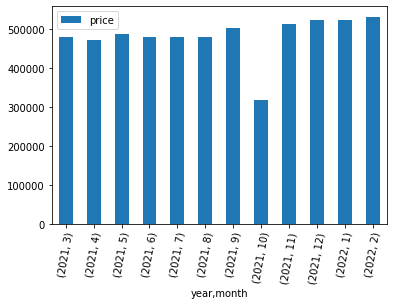

In [50]:
#on aggrège en utilisant un dictionnaire
year_df = trade_p2.groupby( by = ['year', 'month']).agg({'price':'sum'})
year_df.plot(kind='bar')
plt.xticks(rotation=80)

### => il y a un problème en Octobre

In [51]:
#créa multi index pour séparer sous sommes selon categ
month_df = trade_p2.groupby( by = ['year', 'month', 'categ']).agg({'price':'sum'})
month_df.head()

price
year month categ               
2021 3     0.0    193671.975152
           1.0    186974.170000
           2.0     98771.480000
     4     0.0    205323.929125
           1.0    156138.350000

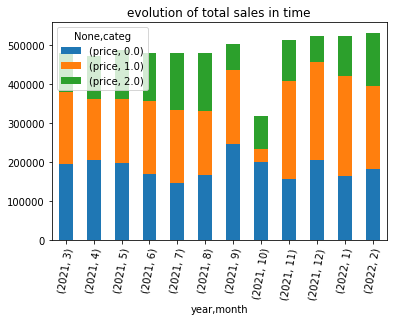

In [52]:
#On passe le 2ème élément du multi index en colonne avec df.unstack('var')
month_unstacked = month_df.unstack('categ')
#On plot
month_unstacked.plot(kind = 'bar', stacked = True)
plt.xticks(rotation=80)
plt.title('evolution of total sales in time')
#plt.savefig("sales_time.png")
plt.show()

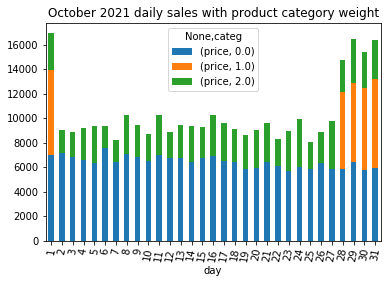

In [53]:
#on va zoomer sur le mois d'Octobre pour comprendre le problème
zoom_oct = trade_p2[trade_p2['month'] == 10 ][['date', 'price', 'categ']].copy()
zoom_oct['day'] = trade_p2['date'].dt.day
#créa multi index pour séparer sous sommes selon categ
day_df = zoom_oct.groupby( by = ['day', 'categ']).sum()[['price']]
#on repasse les categ en colonnes
day_unstacked = day_df.unstack('categ')
#on appli la fonction .plot
day_unstacked.plot(kind = 'bar', stacked = True)
plt.title("October 2021 daily sales with product category weight")
plt.xticks(rotation=80)
#plt.savefig("october_sales_time.png")
plt.show()

**=> Il faut tenir compte de l'absence de données au mois d'Octobre. Le mois d'Octobre représente 1/12 du nombre de données. On envisage de drop les données d'Octobre (et garder un csv) pour notre analyse si le client le spécifiait mais dans cette analyse on le gardera car les données sont précieuses et Octobre représente 1/12 de la période de temps étudiée**

In [54]:
#On garde les données d'Octobre dans un csv
#octobre = trade_p2[trade_p2['month'] == 10].copy()
#octobre.to_csv('trade_p2_Oct21.csv')
#On drop le mois d'Octobre avec le script ci dessous si le client le spécifie
trade_cut = trade_p2.drop(trade_p2[trade_p2['month'] == 10].index)

### ***On créée une table globale : 'trades_pc'***

In [55]:
#on ne garde que les clients qui ont fait des achats pdt la periode
trades_pc = pd.merge(trade_p2, 
                              clients, 
                              on = 'client_id', 
                              how = 'left'
                             )

In [56]:
trades_pc.loc[trades_pc['price'].isnull()]

,id_prod,date,session_id,client_id,time,year,month,hour,price,categ,categ_2,sex,birth,age,age_categ


In [57]:
trades_pc.head()
#trades_pc.to_csv('trades_clean.csv')

,id_prod,date,session_id,client_id,time,year,month,hour,price,categ,categ_2,sex,birth,age,age_categ
0,0_1483,2021-04-10,s_18746,c_4450,18:37:28,2021,4,18,4.99,0.0,0,f,1977,45,25-60
1,2_226,2022-02-03,s_159142,c_277,01:55:53,2022,2,1,65.75,2.0,2,f,2000,22,<=25
2,1_374,2021-09-23,s_94290,c_4270,15:13:46,2021,9,15,10.71,1.0,1,f,1979,43,25-60
3,0_2186,2021-10-17,s_105936,c_4597,03:27:18,2021,10,3,4.20,0.0,0,m,1963,59,25-60
4,0_1351,2021-07-17,s_63642,c_1242,20:34:25,2021,7,20,8.99,0.0,0,f,1980,42,25-60
